**EXP-11 Write a python program to implement Support Vector Machines classifier using credit card data set from kaggle.**

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
%matplotlib inline

In [ ]:
df = pd.read_csv('creditcard.csv') 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,-0.539481,0.524218,-2.224983,1.506368,1.469584,-0.670082,0.122806,0.247449,-0.019811,0.418664,-0.001336,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,-0.639733,2.069409,-1.105807,2.339853,1.921904,-1.153485,-0.336047,0.509636,0.060266,-0.535280,1.437054,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,0.816619,2.557427,-2.480679,1.757415,0.307835,-0.667360,1.424542,0.717358,-1.323944,-0.091943,-2.982379,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,0.089684,-0.085081,-2.392619,1.877502,0.643433,-1.206728,-1.262256,0.563295,1.845204,-0.471718,-0.265041,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0


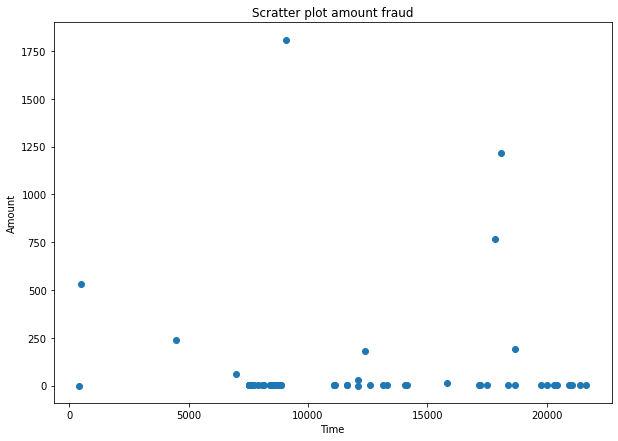

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,7))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y = df['Class'] # We create our label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

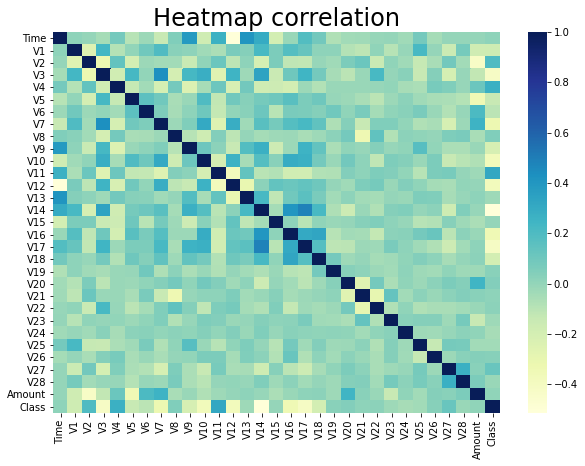

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(10,7))
sb.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sb.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
X_test.dropna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
679,1.255258,0.075190,0.225733,0.881766,0.154508,0.631960,-0.385968,0.189493,0.447980,0.012621,-1.584470,-0.532828,-0.246748,0.180214,1.624271,0.575279,-0.804793,0.308131,-0.467711,-0.148843,0.088457,0.321206,-0.235167,-1.325033,0.643129,-0.133690,0.053069,0.012484,7.00
4441,1.374751,-0.727789,-0.930538,-1.605151,1.444692,3.279702,-1.152110,0.706782,0.358487,0.275603,1.009717,-3.172771,1.871630,1.415648,0.261589,1.535422,0.446475,-0.863011,0.762186,0.250093,-0.269768,-0.905525,0.069109,0.920728,0.351974,-0.509850,-0.022532,0.017838,55.73
12886,1.360574,-0.478431,-0.082341,-0.787673,-0.240550,0.063989,-0.469366,-0.155399,0.087864,0.433489,1.107010,-2.015171,2.797912,1.567400,-0.495251,-0.684648,-0.093513,1.836059,-0.099720,-0.323112,-0.745383,-1.560452,-0.021209,-1.079541,0.179111,0.826737,-0.097304,-0.009707,55.48
12118,-2.298038,2.014193,0.704626,-1.167850,-0.739452,-0.789569,-0.555447,-1.504768,2.040939,-0.024879,0.391239,-2.261325,1.600415,1.417718,-0.213681,0.651419,0.282810,-0.097128,-1.008204,-0.465599,1.400690,-1.017512,0.303525,0.326544,-0.250807,0.611786,-0.778285,0.112775,0.85
4785,-0.231105,1.421676,1.820595,2.930910,0.304631,0.508886,0.281243,0.148131,-0.430039,0.679675,2.685111,-1.616571,2.551758,1.732051,-0.061676,-0.226701,0.738159,0.192004,0.332651,0.249652,-0.060079,0.221684,0.032017,0.170169,-0.481504,0.078544,0.331048,0.125359,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,1.169713,0.292111,0.818720,1.381565,-0.563199,-0.646414,-0.245033,0.028801,1.352202,-0.113745,2.119595,-2.672964,-0.704950,2.415144,-0.240027,0.498661,0.200315,0.541191,-0.261578,-0.331974,-0.436727,-1.175633,0.220797,0.345292,0.119041,-0.771756,-0.019582,0.012206,1.00
11708,1.290011,-0.377393,0.279862,-0.559592,-0.635778,-0.598677,-0.303825,-0.244093,-0.091581,0.411827,2.097781,-1.596714,2.577047,1.712215,-0.689439,-1.029685,0.339774,1.128759,-0.288023,-0.360257,-0.971156,-2.267693,0.277959,-0.079723,-0.158788,0.472774,-0.102527,0.003595,55.95
9548,-0.384009,1.020458,3.061983,3.152269,-0.012524,0.994437,0.013287,0.025609,0.801577,0.179924,-0.537275,-3.072377,1.410986,0.745431,-0.748624,-0.367938,0.936536,0.371807,1.236688,0.171112,-0.372206,-0.436249,-0.286658,-0.177339,0.025213,0.158134,-0.063141,-0.136561,1.52
12233,0.879295,0.001973,-0.094510,1.264449,0.544229,0.705941,0.168938,0.193764,1.159581,-0.522916,1.606485,-2.525081,0.167830,2.430276,1.171046,-1.531022,1.822531,-1.961324,-2.152379,-0.232132,0.037570,0.273465,-0.036151,-0.708290,0.389360,-0.232611,0.009744,0.007320,99.99


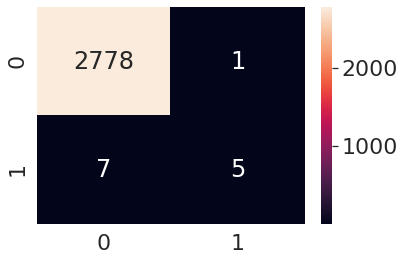

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True,fmt = '')

In [ ]:
accuracy_score(y_pred,y_test)

0.997133643855249